In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

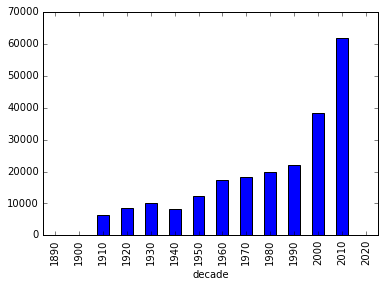

In [6]:
decades = titles.copy()
decades['decade'] = decades['year'] // 10 * 10
decades.groupby('decade')['title'].count().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

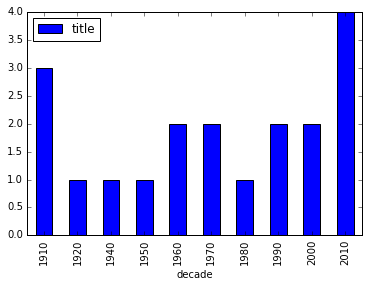

In [19]:
decades = titles.copy()
decades['decade'] = decades['year'] // 10 * 10
is_hamlet = titles['title'] == 'Hamlet'
gb = decades.loc[is_hamlet, ['title', 'decade']].groupby('decade')
gb.count().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [14]:
in_1950s = cast['year'] // 10 == 195
leading = cast['n'] == 1
gb = cast[in_1950s & leading].groupby(['year', 'type'])
gb.size()

year  type   
1950  actor      615
      actress    277
1951  actor      643
      actress    275
1952  actor      598
      actress    288
1953  actor      641
      actress    294
1954  actor      635
      actress    303
1955  actor      620
      actress    272
1956  actor      631
      actress    296
1957  actor      716
      actress    291
1958  actor      703
      actress    280
1959  actor      692
      actress    305
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [18]:
in_1950s = cast['year']//10 == 195
n_1 = cast.n >= 1
n_5 = cast.n <= 5
gb = cast[in_1950s & n_1 & n_5].groupby(['n', 'type'])
gb.size()

n    type   
1.0  actor      6494
     actress    2881
2.0  actor      4462
     actress    4481
3.0  actor      5489
     actress    3092
4.0  actor      5484
     actress    2799
5.0  actor      5512
     actress    2496
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [41]:
pattern = "Pink Panther"
is_panther = cast['title'].str.contains(pattern)
gb = cast[is_panther].groupby(['title', 'year'])
gb['n'].max()

title                           year
Curse of the Pink Panther       1983    63.0
Revenge of the Pink Panther     1978    57.0
Son of the Pink Panther         1993    43.0
The Pink Panther                1963    15.0
                                2006    50.0
The Pink Panther 2              2009    36.0
The Pink Panther Strikes Again  1976    60.0
The Return of the Pink Panther  1975    27.0
Trail of the Pink Panther       1982    32.0
Name: n, dtype: float64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [51]:
gb.count().index

MultiIndex(levels=[[u'An American Werewolf in London', u'Blues Brothers 2000', u'Follow That Bird', u'Innocent Blood', u'Inside Out', u'Labyrinth', u'Monsters, Inc.', u'Muppet Treasure Island', u'Muppets from Space', u'Spies Like Us', u'Star Wars: Episode I - The Phantom Menace', u'Star Wars: Episode II - Attack of the Clones', u'Star Wars: Episode III - Revenge of the Sith', u'Star Wars: Episode V - The Empire Strikes Back', u'Star Wars: Episode VI - Return of the Jedi', u'Star Wars: Episode VII - The Force Awakens', u'Superman III', u'The Adventures of Elmo in Grouchland', u'The Blues Brothers', u'The Dark Crystal', u'The Great Muppet Caper', u'The Muppet Christmas Carol', u'The Muppet Movie', u'The Muppets Take Manhattan', u'Trading Places', u'Zathura: A Space Adventure'], [1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1992, 1996, 1998, 1999, 2001, 2002, 2005, 2015]],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],

In [61]:
is_foz = cast.name == "Frank Oz"
gb = cast[is_foz].groupby(['title', 'year'])
ser = gb['n'].count()
ser[ser>=2].sort_index(level=1)

title                                 year
The Muppet Movie                      1979    8
An American Werewolf in London        1981    2
The Great Muppet Caper                1981    6
The Dark Crystal                      1982    2
The Muppets Take Manhattan            1984    7
Follow That Bird                      1985    3
The Muppet Christmas Carol            1992    7
Muppet Treasure Island                1996    4
Muppets from Space                    1999    4
The Adventures of Elmo in Grouchland  1999    3
Name: n, dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [71]:
is_foz = cast.name == "Frank Oz"
gb = cast[is_foz].groupby('character')
df_characters = gb.size()
df_characters[df_characters>=2].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64